In [136]:
import pandas as pd 
import numpy as np
import time
import string
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve
from IPython.display import display
import re
import nltk
from nltk import FreqDist
from keras import backend
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, Dropout, BatchNormalization, AveragePooling1D, Input, Concatenate, Conv1D,MaxPool1D, Flatten
from keras.layers.embeddings import Embedding
from keras.metrics import Recall
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# import spacy
# import cupy
# nlp = spacy.load("en_core_web_lg")

In [137]:
df = pd.read_json('C:/Users/Hemanth/Downloads/ML Project/IMDB_reviews.json', lines = True)
md = pd.read_json('C:/Users/Hemanth/Downloads/ML Project/IMDB_movie_details.json', lines = True)

In [138]:
y = list(md['plot_synopsis'])

In [139]:
allplotsynopsis = []
stop_words = set(stopwords.words('english'))
start = time.time()
for i in y:
    i = i.lower()
    i = word_tokenize(i)
    a = []
    for w in i:
        if w not in stop_words and w not in string.punctuation:
            a.append(w)
    allplotsynopsis.append(a)
elapsed_time_fl = (time.time() - start)

In [140]:
print(elapsed_time_fl)

14.235953569412231


In [141]:
ids = []
for i in range(0, len(allplotsynopsis)):
    if allplotsynopsis[i] == []:
        ids.append(i)
print(ids)      

[2, 10, 11, 22, 24, 32, 41, 45, 46, 54, 59, 62, 81, 84, 94, 98, 127, 128, 129, 131, 132, 135, 145, 146, 148, 150, 156, 160, 167, 168, 175, 177, 182, 185, 193, 204, 210, 211, 213, 219, 220, 221, 234, 254, 255, 258, 278, 279, 281, 287, 294, 303, 315, 317, 325, 326, 328, 329, 330, 344, 358, 362, 374, 375, 385, 392, 399, 419, 420, 427, 445, 452, 453, 458, 460, 463, 468, 479, 480, 489, 499, 531, 537, 538, 543, 545, 552, 557, 563, 577, 579, 582, 592, 596, 598, 599, 607, 613, 620, 639, 652, 655, 661, 663, 667, 672, 701, 703, 723, 724, 727, 743, 746, 771, 779, 790, 791, 796, 805, 807, 808, 810, 818, 826, 842, 844, 851, 853, 855, 860, 877, 893, 894, 904, 910, 920, 943, 946, 955, 960, 963, 964, 965, 967, 974, 979, 991, 998, 1001, 1003, 1012, 1014, 1016, 1025, 1028, 1030, 1044, 1047, 1059, 1070, 1080, 1092, 1093, 1098, 1109, 1110, 1114, 1119, 1131, 1133, 1143, 1144, 1153, 1156, 1161, 1163, 1179, 1189, 1191, 1195, 1198, 1200, 1205, 1209, 1219, 1228, 1229, 1236, 1251, 1258, 1273, 1278, 1283, 1288, 

In [142]:
mdcut = md.drop(ids)
mdcut = mdcut.reset_index(drop = True)
mdcut

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
3,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...
4,tt0286716,"Bruce Banner, a brilliant scientist with a clo...",2h 18min,"[Action, Sci-Fi]",5.7,2003-06-20,Bruce Banner (Eric Bana) is a research scienti...
...,...,...,...,...,...,...,...
1334,tt0120655,An abortion clinic worker with a special herit...,2h 10min,"[Adventure, Comedy, Drama]",7.3,1999-11-12,The film opens with a homeless man (Bud Cort) ...
1335,tt0276751,Twelve year old Marcus Brewer lives with his c...,1h 41min,"[Comedy, Drama, Romance]",7.1,2002-05-17,Will Freeman (Hugh Grant) is a 38-year-old bac...
1336,tt0289879,Evan Treborn grows up in a small town with his...,1h 53min,"[Sci-Fi, Thriller]",7.7,2004-01-23,"In the year 1998, Evan Treborn (Ashton Kutcher..."
1337,tt1723811,Brandon is a 30-something man living in New Yo...,1h 41min,[Drama],7.2,2012-01-13,"Brandon (Michael Fassbender) is a successful, ..."


In [143]:
movie_ids = list(mdcut['movie_id'])

In [144]:
new_df = df[df.movie_id.isin(movie_ids)]

In [145]:
new_df = new_df.reset_index(drop = True)
new_df

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"
...,...,...,...,...,...,...,...
538823,8 August 1999,tt0139239,ur0100166,False,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties
538824,31 July 1999,tt0139239,ur0021767,False,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie
538825,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen
538826,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?


# Exploratory Data analysis

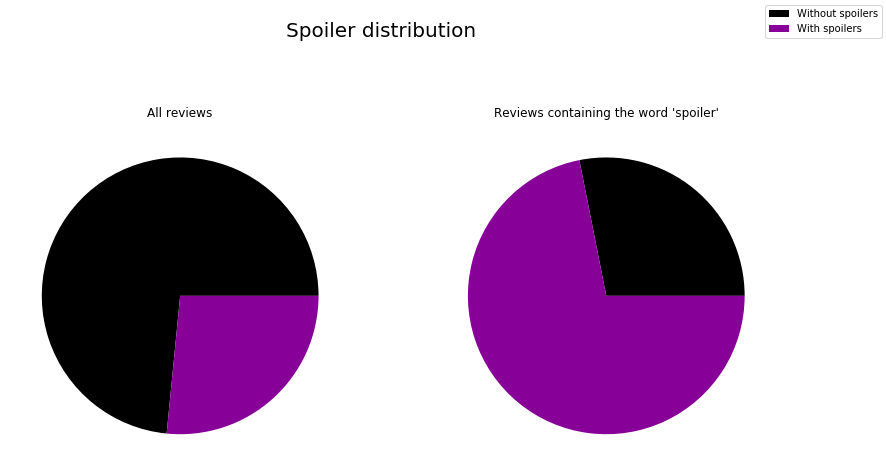

In [146]:
meta_data = pd.DataFrame()
meta_data['is_spoiler'] = new_df['is_spoiler']
meta_data['has_word_spoiler'] = new_df['review_text'].apply(lambda text: 1 if 'SPOILER' in text.upper() else 0)
pie1 = meta_data['is_spoiler'].value_counts().reset_index().sort_values(by='index')
pie4 = meta_data[meta_data['has_word_spoiler'] == 1]['is_spoiler'].value_counts().reset_index().sort_values(by='index')
cc = plt.cycler("color", plt.cm.nipy_spectral(np.linspace(0,.9,10)))
with plt.style.context({"axes.prop_cycle" : cc}):
    fig = plt.figure(figsize=(14, 14))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    ax1.pie(pie1['is_spoiler'])
    ax1.set_title('All reviews')
    ax2.pie(pie4['is_spoiler'])
    ax2.set_title('Reviews containing the word \'spoiler\'')
    plt.suptitle('Spoiler distribution', fontsize=20)
    fig.legend(labels=['Without spoilers', 'With spoilers'], loc='upper right')
    plt.show()

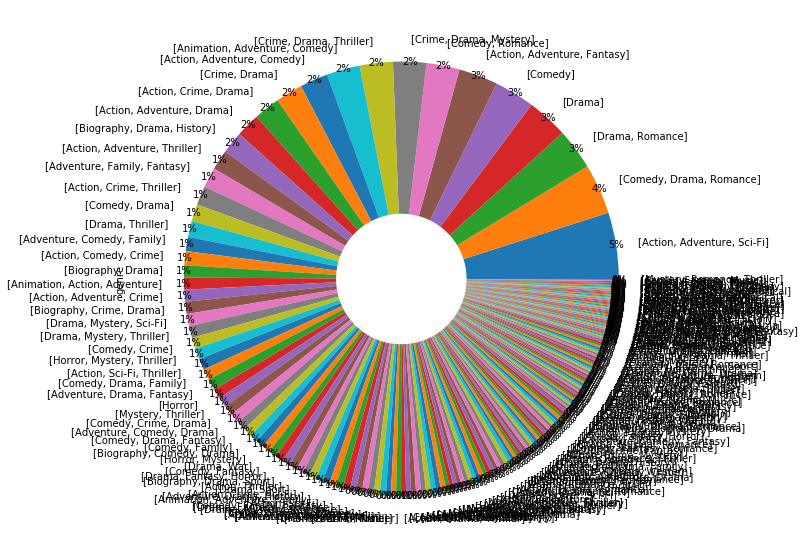

In [147]:
mdcut.genre.value_counts().plot.pie(autopct="%.0f%%",figsize=(10,10),pctdistance=1, wedgeprops=dict(width=0.7))
plt.show()

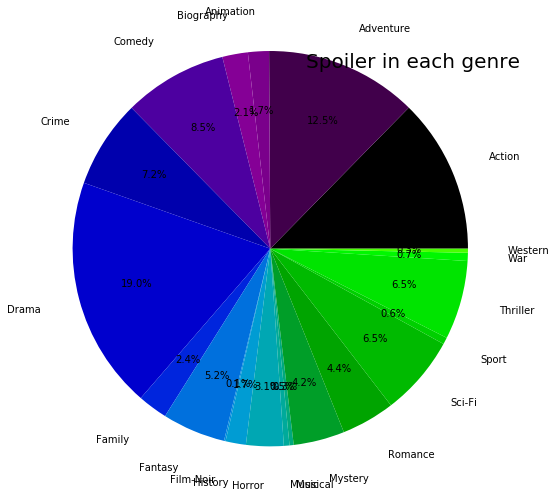

In [148]:
genre_names = np.unique(np.array(' '.join(mdcut.genre.str.join(' ')).split()))
for g in genre_names:
    mdcut[g.lower()] = 0
for i,j in mdcut.iterrows():
    genres = j['genre']
    for g in genre_names:
        mdcut.at[i,g.lower()] = int(g in genres)
df = pd.merge(new_df,mdcut,on='movie_id')
genre_spoilers = np.zeros(len(genre_names))
for i,g in enumerate(genre_names):
    genre_spoilers[i] = df[df[g.lower()]==1].shape[0]
cc = plt.cycler("color", plt.cm.nipy_spectral(np.linspace(0,.9,30)))
with plt.style.context({"axes.prop_cycle" : cc}):
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.pie(genre_spoilers,labels=genre_names,radius=2,autopct='%1.1f%%',pctdistance=0.7, labeldistance=1.2)
    plt.suptitle('Spoiler in each genre', fontsize=20)
    plt.show()

Text(0, 0.5, 'Number of movies')

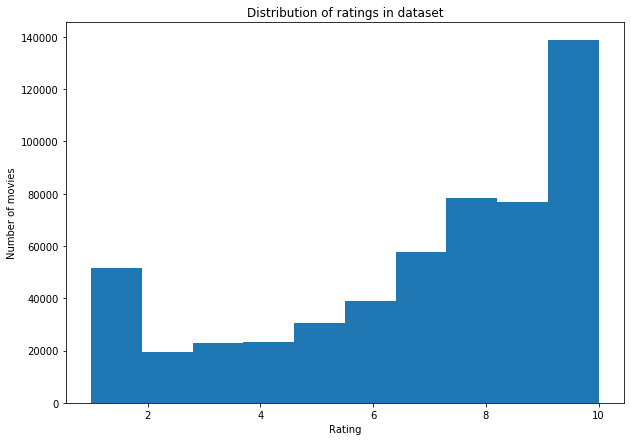

In [149]:
details = new_df
details.head()
plt.figure(figsize=(10,7))
plt.hist(details.rating,bins=details.rating.nunique())
plt.title("Distribution of ratings in dataset")
plt.xlabel("Rating")
plt.ylabel("Number of movies")

# Sentiment Analysis

In [150]:
sia = SentimentIntensityAnalyzer()
def get_polarity_score(sentence):
    score = sia.polarity_scores(sentence)
    return score

In [151]:
start = time.time()
sentiment = []
sentiment_score = []
for summary in new_df["review_summary"]:
    polarity = get_polarity_score(summary)
    sentiment_score.append(polarity['compound'])
    if polarity['compound'] >= 0.05 : 
        sentiment.append("Positive") 
    elif polarity['compound'] <= - 0.05 : 
        sentiment.append("negative") 
    else : 
        sentiment.append("neutral")
new_df['sentiment'] = sentiment
new_df['sentiment_score'] = sentiment_score
end = (time.time() - start)
print(end)

20.833326816558838


In [152]:
new_df = new_df.replace(['Positive', 'neutral', 'negative'], [1, 0, -1])

In [153]:
new_df

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,sentiment,sentiment_score
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,0,0.0000
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,1,0.8402
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,1,0.6369
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,0,0.0000
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",1,0.6249
...,...,...,...,...,...,...,...,...,...
538823,8 August 1999,tt0139239,ur0100166,False,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties,1,0.6369
538824,31 July 1999,tt0139239,ur0021767,False,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie,0,0.0000
538825,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen,1,0.6369
538826,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?,0,0.0000


In [154]:
new_df[['sentiment', 'sentiment_score', 'is_spoiler']].corr()['is_spoiler'][:]

sentiment         -0.060198
sentiment_score   -0.067269
is_spoiler         1.000000
Name: is_spoiler, dtype: float64

In [155]:
new_df = new_df.drop(['sentiment', 'sentiment_score'], axis = 1)

In [156]:
new_df

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"
...,...,...,...,...,...,...,...
538823,8 August 1999,tt0139239,ur0100166,False,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties
538824,31 July 1999,tt0139239,ur0021767,False,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie
538825,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen
538826,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?


# Sentence Comparison Do Not Run

In [157]:
# review_list = list(new_df['review_text'])
# review_list = review_list[100001:112500]
# synopsis_list = list(new_df['plot_synopsis'])
# synopsis_list = synopsis_list[100001:112500]
# start = time.time()
# scores = []
# for i in range(0, len(synopsis_list)):
#     doc1 = nlp(review_list[i])
#     doc2 = nlp(synopsis_list[i])
#     scores.append(doc2.similarity(doc1))
# elapsed_time_fl = (time.time() - start) 
# print(elapsed_time_fl) 
# labellist = list(new_df['is_spoiler'])
# labellist = labellist[50001: 100000]

In [158]:
labels = pd.read_csv('labels 50001-100000.csv')
scores = pd.read_csv('50001-100000.csv')
label = list(labels['0'])
scores['labels'] = label
scores.rename(columns={'0':'score'}, inplace=True)

In [159]:
scores[['score', 'labels']].corr()['labels'][:]

score     0.213383
labels    1.000000
Name: labels, dtype: float64

# Model

In [160]:
new_df = new_df[0:300000]

In [161]:
def token_stop(text):
    text = text.lower() 
    text = re.sub('[^a-zA-Z]',' ', text)
    words = text.split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    text = " ".join(words)
    return text

In [162]:
word_embed = dict()
file = open('glove.6B.50d.txt', encoding = 'utf8')
for line in file:
    values = line.split()
    word = values[0]
    coeff = np.asarray(values[1:], dtype='float32')
    word_embed[word] = coeff
file.close()

In [163]:
new_df = pd.merge(new_df,mdcut.drop('rating',axis=1),on='movie_id')[new_df.columns.values]
new_df.is_spoiler.value_counts()
lencoder = preprocessing.LabelEncoder()
new_df.is_spoiler = lencoder.fit_transform(new_df.is_spoiler)

spoiler_sum = new_df.groupby(by='movie_id').is_spoiler.agg(['sum']).reset_index().rename(columns={'sum':'msc'})
spoiler_tot = new_df.groupby(by='movie_id').is_spoiler.agg(['count']).reset_index().rename(columns={'count':'mtc'})
sum_tot_relation = pd.merge(spoiler_sum, spoiler_tot, on='movie_id')
sum_tot_relation['sum_tot_relation'] = (sum_tot_relation.msc / sum_tot_relation.mtc)
sum_tot_relation.drop(['msc','mtc'], axis=1, inplace=True)
display(sum_tot_relation)
new_df = pd.merge(new_df, sum_tot_relation, on='movie_id')

,movie_id,sum_tot_relation
0,tt0015864,0.304688
1,tt0017136,0.216617
2,tt0017925,0.260417
3,tt0018455,0.353933
4,tt0019254,0.176923
...,...,...
670,tt5439796,0.252941
671,tt5519340,0.125253
672,tt5580036,0.225806
673,tt5580390,0.351351


In [164]:
reviewer_tendency = new_df.groupby(by='user_id').is_spoiler.agg(['sum']).reset_index().rename(columns={'sum':'usc'})
reviewer_score = new_df.groupby(by='user_id').is_spoiler.agg(['count']).reset_index().rename(columns={'count':'utc'})
reviewer_relation = pd.merge(reviewer_tendency, reviewer_score, on='user_id')
reviewer_relation['reviewer_relation'] = reviewer_relation.usc / reviewer_relation.utc
reviewer_relation.drop(['usc','utc'], axis=1, inplace=True)
display(reviewer_relation.sample(frac=1))
new_df = pd.merge(new_df, reviewer_relation, on='user_id')

,user_id,reviewer_relation
61338,ur2433611,0.0
21397,ur11730959,0.5
128678,ur61424235,0.0
85410,ur34875849,0.0
99265,ur43690329,0.0
...,...,...
32014,ur1526742,0.0
371,ur0033821,0.0
74265,ur29114329,0.0
22238,ur1198692,0.0


In [165]:
movie_genres = np.unique(np.array(' '.join(mdcut.genre.str.join(' ')).split()))
print(movie_genres)

for genre in movie_genres:
    mdcut[genre.lower()] = 0

for index,row in mdcut.iterrows():
    genres = row['genre']
    for k in movie_genres:
        mdcut.at[index,k.lower()] = int(k in genres)

genre_new_df = pd.merge(new_df,mdcut,on='movie_id')
genre_tendency = np.zeros(len(movie_genres))
for a,b in enumerate(movie_genres):
    genre_tendency[a] = genre_new_df[genre_new_df[b.lower()]==1].shape[0]

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western']


In [166]:
import time
start = time.time()
new_df['review_data'] = new_df.review_text.apply(token_stop)
elapsed_time_fl = (time.time() - start)
print(elapsed_time_fl)

18179.573997735977


In [167]:
max_length = new_df.review_data.apply(lambda x: len(x.split())).max()
t = Tokenizer()
t.fit_on_texts(new_df.review_data)
word_vocab_length = len(t.word_index) + 1
text_seq = t.texts_to_sequences(new_df.review_data)
text_arr = pad_sequences(text_seq, maxlen=max_length, padding='post')
test_pad = text_arr[240000:, :]
text_arr = text_arr[0:240000, :]
print(test_pad.shape)
print(text_arr.shape)

(60000, 1246)
(240000, 1246)


In [168]:
vocab_matrix = np.zeros((word_vocab_length, 50))
for w, i in t.word_index.items():
    vocab_vector = word_embed.get(w)
    if vocab_vector is not None:
        vocab_matrix[i] = vocab_vector

In [169]:
new_df['rating'] = (new_df.rating - new_df.rating.min()) / (new_df.rating.max() - new_df.rating.min())

In [170]:
columns = [i.lower() for i in movie_genres] + ['rating_x','sum_tot_relation','reviewer_relation']
numeric_data = pd.merge(new_df,mdcut,on='movie_id')[columns]

test_features = numeric_data.iloc[240000:, :]
numeric_data = numeric_data.iloc[0:240000, :]

In [171]:
text_arr_layer = Input(shape=text_arr.shape[1:])
print(text_arr.shape)
numeric_data_layer = Input(shape=numeric_data.shape[1:])

vocab_layer = Embedding(word_vocab_length, 50, input_length=max_length, weights=[vocab_matrix], trainable=False)(text_arr_layer)

avp_layer = AveragePooling1D(pool_size=200)(vocab_layer)
avp_layer = Reshape((-1,1))(avp_layer)
convo1D_layer = Conv1D(filters=3, kernel_size=10, activation='relu')(avp_layer)
pooling_layer = MaxPool1D(strides=2)(convo1D_layer)
flat_layer = Flatten()(pooling_layer)

combine_all_layer = Concatenate()([flat_layer, numeric_data_layer])
full_cnn = Dense(64, activation='relu')(combine_all_layer)
full_cnn = Dropout(0.25)(full_cnn)
full_cnn = Dense(64, activation='relu')(full_cnn)
full_cnn = Dropout(0.25)(full_cnn)
full_cnn = Dense(64, activation='tanh')(full_cnn)
full_cnn = Dropout(0.25)(full_cnn)
output_layer = Dense(1, activation='sigmoid')(full_cnn)

model = Model([text_arr_layer, numeric_data_layer],

output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',Recall()])
print(model.summary())
print(text_arr.shape)

(240000, 1246)
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 1246)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1246, 50)     9440650     input_5[0][0]                    
__________________________________________________________________________________________________
average_pooling1d_3 (AveragePoo (None, 6, 50)        0           embedding_3[0][0]                
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 300, 1)       0           average_pooling1d_3[0][0]        
_____________________________________________________________________________

In [172]:
model.fit([text_arr,numeric_data], new_df.is_spoiler[0:240000], batch_size=24000, validation_split=0.2, epochs = 30, shuffle=True)

Train on 192000 samples, validate on 48000 samples
Epoch 1/30
192000/192000 [==============================] - 18s 92us/step - loss: 0.6256 - accuracy: 0.7213 - recall_3: 0.0163 - val_loss: 0.6565 - val_accuracy: 0.6619 - val_recall_3: 0.0000e+00
Epoch 2/30
192000/192000 [==============================] - 17s 89us/step - loss: 0.5914 - accuracy: 0.7288 - recall_3: 2.4969e-04 - val_loss: 0.6314 - val_accuracy: 0.6619 - val_recall_3: 0.0000e+00
Epoch 3/30
192000/192000 [==============================] - 17s 88us/step - loss: 0.5737 - accuracy: 0.7287 - recall_3: 0.0044 - val_loss: 0.6284 - val_accuracy: 0.6619 - val_recall_3: 0.0000e+00
Epoch 4/30
192000/192000 [==============================] - 17s 88us/step - loss: 0.5644 - accuracy: 0.7287 - recall_3: 0.0105 - val_loss: 0.6189 - val_accuracy: 0.6621 - val_recall_3: 0.0010
Epoch 5/30
192000/192000 [==============================] - 17s 88us/step - loss: 0.5582 - accuracy: 0.7285 - recall_3: 0.0107 - val_loss: 0.6220 - val_accuracy: 0.6

In [174]:
y_pred = model.predict([test_pad,test_features])

pred_list = []
for i in range(0, len(y_pred)):
    if y_pred[i][0] < 0.3:
        pred_list.append(0)
    else:
        pred_list.append(1)

       predicted  True labels
0              0            0
1              0            1
2              0            0
3              0            0
4              0            0
...          ...          ...
59995          0            0
59996          0            0
59997          1            0
59998          0            0
59999          0            0

[60000 rows x 2 columns]


In [182]:
x = pd.DataFrame({
    'predicted' : pred_list,
    'True_labels': list(new_df.is_spoiler[240000:])
})
print(x)

       predicted  True_labels
0              0            0
1              0            1
2              0            0
3              0            0
4              0            0
...          ...          ...
59995          0            0
59996          0            0
59997          1            0
59998          0            0
59999          0            0

[60000 rows x 2 columns]


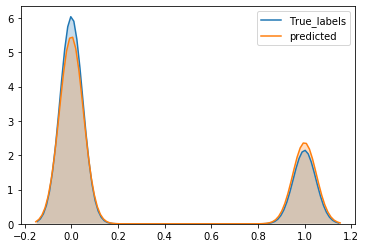

In [183]:
for col in ["True_labels", "predicted"]:
    sns.kdeplot(x[col], shade=True)

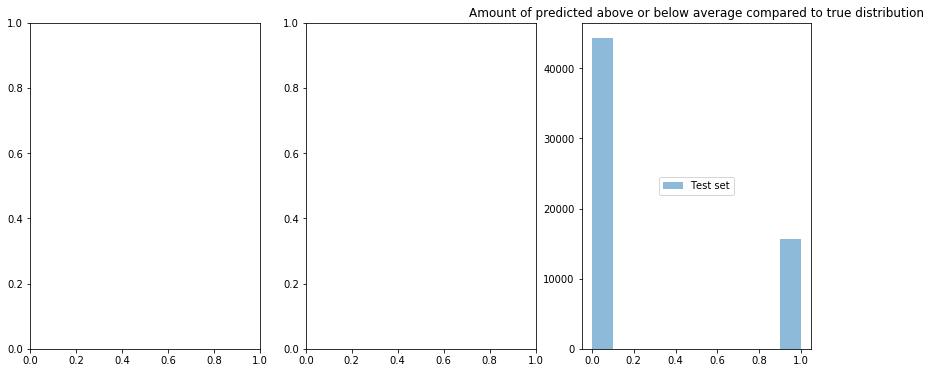

In [184]:
fig ,axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
plt.hist(x["True_labels"], alpha=0.5, label='Test set')
plt.legend(loc='center')
plt.title("Amount of predicted above or below average compared to true distribution")
plt.show()

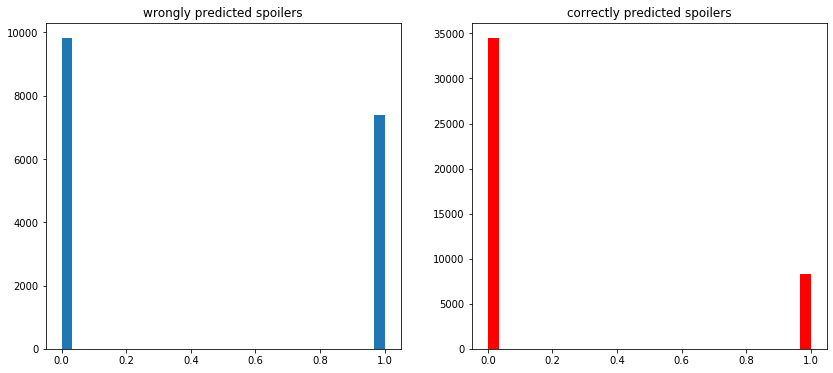

In [187]:
wrongly_predicted = x.loc[x["predicted"] != x["True_labels"]].True_labels
correctly_predicted = x.loc[x["predicted"] == x["True_labels"]].predicted
fig ,axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
axes[0].set_title("wrongly predicted spoilers")
axes[0].hist(wrongly_predicted,bins=30)
axes[1].set_title("correctly predicted spoilers")
axes[1].hist(correctly_predicted, color="red",bins=30)
plt.show()

In [186]:
print(classification_report(list(new_df.is_spoiler[240000:]), pred_list))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80     44290
           1       0.46      0.53      0.49     15710

    accuracy                           0.71     60000
   macro avg       0.64      0.65      0.65     60000
weighted avg       0.73      0.71      0.72     60000

